In [1]:
%run IDM_helper_functions.ipynb

In [2]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [3]:
import pandas as pd
import os
import scipy.io as sio

In [94]:
directory = "/Users/wangjiashun/Desktop/SAT-Rafiei"
sub = 1
session = 1
file = directory+"/Subject "+str(sub)+"/Session"+str(session)
file

'/Users/wangjiashun/Desktop/SAT-Rafiei/Subject 1/Session1'

In [95]:
data_session_sub = sio.loadmat(file)["p"]

In [101]:
import seaborn as sns


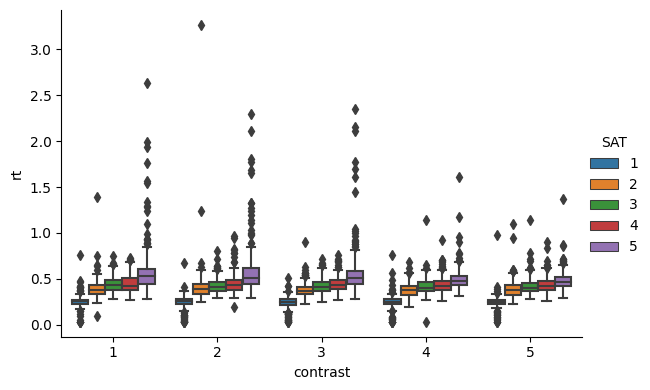

In [113]:
#df_check = df_sub[df_sub.SAT == ]
#df_check = df_sub[df_sub.contrast == 5]

sns.catplot(data=df_sub, x="contrast", y="rt", hue="SAT", kind="box",
            height=4, aspect=6/4)

# Data preprocessing


In [ ]:
for sub in range(30): # over participants

    df_sub = pd.DataFrame(columns = ['contrast', 'SAT', 'rt', 'correct'],)
    for session in range(5): # over session
        file = directory+"/Subject "+str(sub+1)+"/Session"+str(session+1)+'.mat'
        #print(os.path.exists(file))
        if not os.path.exists(file):
            break
        
        data_session_sub = sio.loadmat(file)["p"]

        for i in range(4): # over runs
            for j in range(5): # over blocks
                SAT = [data_session_sub["condition"][0,0][i,j]]*50
                contrast = data_session_sub["data"][0,0][i,j]["contrast"][0,0]
                rt = data_session_sub["data"][0,0][i,j]["rt"][0,0]
                correct = data_session_sub["data"][0,0][i,j]["correct"][0,0]

                df_block = pd.DataFrame({'contrast':contrast[0,:], 
                                         'SAT':np.array(SAT), 
                                         'rt':rt[0,:], 
                                         'correct':correct[0,:]})
                df_sub = df_sub.append(df_block)


    df_sub.to_csv('data_sub'+str(sub+1)+'.csv')


In [135]:
i = 0
path = os.path.join(data_dir+str(i+1)+".csv")
df = pd.read_csv(path)
df

,Unnamed: 0,contrast,SAT,rt,correct
0,0,1,2,0.333174,0
1,1,1,2,0.254905,1
2,2,3,2,0.229423,0
3,3,2,2,0.243612,0
4,4,5,2,0.226315,1
...,...,...,...,...,...
4995,45,1,3,0.279900,0
4996,46,5,3,0.325039,0
4997,47,2,3,0.408336,0
4998,48,4,3,0.438938,1


In [8]:
data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['contrast', 'SAT', 'participant', 'v','a','ter','k'],)


i=1
for sub in range(10,20):
    for contrast in range(5):
        for SAT in range(5):
            print(i)
            i+=1
    
            path = os.path.join(data_dir+str(sub+1)+".csv")
            df = pd.read_csv(path)
            df = df[df["contrast"]==contrast+1] # one contrast condition
            df = df[df["SAT"]==SAT+1] # # one SAT condition

            data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
            samp = Sample.from_numpy_array(data_sub, column_names = [])

            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                            t = 0,
                                            x=Fittable(minval=-30, maxval=30)),
                          noise=NoiseConstant(noise=1),
                          bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                          dx=.001, dt=.001, T_dur=3)

            fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustBIC, verbose=False)
            
            df_sub = pd.DataFrame(columns = ['contrast', 'SAT', 'participant', 'v','a','ter','k'],)

            df_sub = pd.DataFrame({'contrast':contrast+1, 
                                   'SAT':SAT+1, 
                                   'participant': sub + 1,
                                   'v': np.array(model_fit.parameters()['drift']['drift']), 
                                   'a': np.array(model_fit.parameters()['bound']['B']),
                                   'ter': np.array(model_fit.parameters()['overlay']['nondectime']),
                                   'k': np.array(model_fit.parameters()['drift']['x'])
                                  }, index=[i])
            
            df_all = df_all.append(df_sub)

            print(df_sub)


1


Info: Params [0.46586487 8.52664434 1.36603946 0.10039863] gave 120.76346090669539


   contrast  SAT  participant         v         a       ter         k
2         1    1           11  0.465865  1.366039  0.100399  8.526644
2


Info: Params [ 0.2410255  11.83868871  3.66081118  0.10010074] gave -179.64244699998557


   contrast  SAT  participant         v         a       ter          k
3         1    2           11  0.241026  3.660811  0.100101  11.838689
3


Info: Params [ 0.71553952 14.64545866  7.75341922  0.10291941] gave -253.18701859070546


   contrast  SAT  participant        v         a       ter          k
4         1    3           11  0.71554  7.753419  0.102919  14.645459
4


Info: Params [ 0.83703732 13.84368725  7.55073274  0.10779763] gave -228.1756891956264


   contrast  SAT  participant         v         a       ter          k
5         1    4           11  0.837037  7.550733  0.107798  13.843687
5


Info: Params [0.62796426 3.77232601 0.68357839 0.27256894] gave 36.51951247803662


   contrast  SAT  participant         v         a       ter         k
6         1    5           11  0.627964  0.683578  0.272569  3.772326
6


Info: Params [ 0.50941439 10.70829387  2.0601413   0.10024561] gave 35.98735194895772


   contrast  SAT  participant         v         a       ter          k
7         2    1           11  0.509414  2.060141  0.100246  10.708294
7


Info: Params [0.94788003 9.51923711 2.30663985 0.10063874] gave -60.52041618713257


   contrast  SAT  participant        v        a       ter         k
8         2    2           11  0.94788  2.30664  0.100639  9.519237
8


Info: Params [ 0.6753748  12.2688665   4.65406069  0.10044229] gave -197.11467099547323


   contrast  SAT  participant         v         a       ter          k
9         2    3           11  0.675375  4.654061  0.100442  12.268866
9


Info: Params [ 0.94899702 14.44066803  2.53640114  0.18519852] gave -269.9633773067251


    contrast  SAT  participant         v         a       ter          k
10         2    4           11  0.948997  2.536401  0.185199  14.440668
10


Info: Params [1.40515105 6.80797935 0.91267543 0.24793946] gave -84.58885420692363


    contrast  SAT  participant         v         a       ter         k
11         2    5           11  1.405151  0.912675  0.247939  6.807979
11


Info: Params [0.72608216 8.77243668 1.01230008 0.15182697] gave 200.9196874336281


    contrast  SAT  participant         v       a       ter         k
12         3    1           11  0.726082  1.0123  0.151827  8.772437
12


Info: Params [1.0415812  8.54287179 1.89200823 0.10087105] gave -119.79335084327055


    contrast  SAT  participant         v         a       ter         k
13         3    2           11  1.041581  1.892008  0.100871  8.542872
13


Info: Params [ 1.29087242 14.14350685  4.85065626  0.13634358] gave -277.78550829244455


    contrast  SAT  participant         v         a       ter          k
14         3    3           11  1.290872  4.850656  0.136344  14.143507
14


Info: Params [ 1.78081348 15.91633693  8.06699091  0.13750175] gave -356.84284101530665


    contrast  SAT  participant         v         a       ter          k
15         3    4           11  1.780813  8.066991  0.137502  15.916337
15


Info: Params [2.09404026 7.47910806 0.81816682 0.27772058] gave -105.55330632106616


    contrast  SAT  participant        v         a       ter         k
16         3    5           11  2.09404  0.818167  0.277721  7.479108
16


Info: Params [1.23651717 8.01137796 1.35617031 0.10020424] gave 225.4530548026833


    contrast  SAT  participant         v        a       ter         k
17         4    1           11  1.236517  1.35617  0.100204  8.011378
17


Info: Params [ 1.5629747  10.66094497  3.11192476  0.10052192] gave -267.8181152185544


    contrast  SAT  participant         v         a       ter          k
18         4    2           11  1.562975  3.111925  0.100522  10.660945
18


Info: Params [ 2.80971859 12.451145    2.68008219  0.17075774] gave -435.10500109483587


    contrast  SAT  participant         v         a       ter          k
19         4    3           11  2.809719  2.680082  0.170758  12.451145
19


Info: Params [ 3.33005489 12.62439542  2.87121176  0.19187228] gave -485.1567083083608


    contrast  SAT  participant         v         a       ter          k
20         4    4           11  3.330055  2.871212  0.191872  12.624395
20


Info: Params [3.09475059 6.88390677 0.96131028 0.26022753] gave -378.2234261642664


    contrast  SAT  participant         v        a       ter         k
21         4    5           11  3.094751  0.96131  0.260228  6.883907
21


Info: Params [1.48724089 8.41646982 1.52428685 0.10014337] gave -109.71645018060777


    contrast  SAT  participant         v         a       ter        k
22         5    1           11  1.487241  1.524287  0.100143  8.41647
22


Info: Params [ 2.15997217 14.03910871  6.84028933  0.10001317] gave -296.48238564540804


    contrast  SAT  participant         v         a       ter          k
23         5    2           11  2.159972  6.840289  0.100013  14.039109
23


Info: Params [ 2.93581442 12.82500636  2.13318174  0.19018129] gave -263.9841104607091


    contrast  SAT  participant         v         a       ter          k
24         5    3           11  2.935814  2.133182  0.190181  12.825006
24


Info: Params [4.04214266 9.6789866  1.19799976 0.24188074] gave -529.9063943248292


    contrast  SAT  participant         v      a       ter         k
25         5    4           11  4.042143  1.198  0.241881  9.678987
25


Info: Params [3.80902218 6.40630473 1.27966713 0.24757401] gave -472.95443155920947


    contrast  SAT  participant         v         a       ter         k
26         5    5           11  3.809022  1.279667  0.247574  6.406305
26


Info: Params [0.00901283 7.73798194 0.66493097 0.10034763] gave 627.9777996822227


    contrast  SAT  participant         v         a       ter         k
27         1    1           12  0.009013  0.664931  0.100348  7.737982
27


Info: Params [0.20095894 7.29220278 1.0930087  0.10026938] gave 392.07487909622074


    contrast  SAT  participant         v         a       ter         k
28         1    2           12  0.200959  1.093009  0.100269  7.292203
28


Info: Params [0.04673055 9.64494111 4.60905139 0.10083296] gave -76.5808843955604


    contrast  SAT  participant         v         a       ter         k
29         1    3           12  0.046731  4.609051  0.100833  9.644941
29


Info: Params [0.45047356 8.37269555 3.66419802 0.1008022 ] gave -25.120992107380413


    contrast  SAT  participant         v         a       ter         k
30         1    4           12  0.450474  3.664198  0.100802  8.372696
30


Info: Params [0.560797   5.29091668 1.21785852 0.26254689] gave 107.6647655863179


    contrast  SAT  participant         v         a       ter         k
31         1    5           12  0.560797  1.217859  0.262547  5.290917
31


Info: Params [ 0.01928738 11.59526295  0.96427785  0.1005595 ] gave 1067.4817184322492


    contrast  SAT  participant         v         a      ter          k
32         2    1           12  0.019287  0.964278  0.10056  11.595263
32


Info: Params [0.39462298 7.97452073 1.32577273 0.10045646] gave 62.1514046526178


    contrast  SAT  participant         v         a       ter         k
33         2    2           12  0.394623  1.325773  0.100456  7.974521
33


Info: Params [0.85319599 7.92614582 1.28903851 0.2073185 ] gave -52.99200485753666


    contrast  SAT  participant         v         a       ter         k
34         2    3           12  0.853196  1.289039  0.207319  7.926146
34


Info: Params [1.07305991 6.72572759 1.43369502 0.20321045] gave -46.75760359658479


    contrast  SAT  participant        v         a      ter         k
35         2    4           12  1.07306  1.433695  0.20321  6.725728
35


Info: Params [0.87950177 4.72718883 1.41217471 0.23320213] gave 142.7422127796905


    contrast  SAT  participant         v         a       ter         k
36         2    5           12  0.879502  1.412175  0.233202  4.727189
36


Info: Params [0.14440468 9.30580978 0.71512766 0.10090056] gave 581.0182823795644


    contrast  SAT  participant         v         a       ter        k
37         3    1           12  0.144405  0.715128  0.100901  9.30581
37


Info: Params [0.04341755 8.29626789 1.51766093 0.1000746 ] gave 334.65096873139726


    contrast  SAT  participant         v         a       ter         k
38         3    2           12  0.043418  1.517661  0.100075  8.296268
38


Info: Params [1.50377601 8.00968661 1.49177955 0.20542028] gave -148.33058919852917


    contrast  SAT  participant         v        a      ter         k
39         3    3           12  1.503776  1.49178  0.20542  8.009687
39


Info: Params [1.28367393 5.00608672 0.89474888 0.24850549] gave -76.42709116658595


    contrast  SAT  participant         v         a       ter         k
40         3    4           12  1.283674  0.894749  0.248505  5.006087
40


Info: Params [1.33961371 5.33167093 1.33881998 0.26177336] gave 32.09286838390804


    contrast  SAT  participant         v        a       ter         k
41         3    5           12  1.339614  1.33882  0.261773  5.331671
41


Info: Params [0.15475351 8.78315049 0.69560343 0.10099059] gave 955.7993463880641


    contrast  SAT  participant         v         a       ter        k
42         4    1           12  0.154754  0.695603  0.100991  8.78315
42


Info: Params [0.45067146 8.38664234 1.5295807  0.10233193] gave 129.4803327656039


    contrast  SAT  participant         v         a       ter         k
43         4    2           12  0.450671  1.529581  0.102332  8.386642
43


Info: Params [2.11697017 7.49291562 1.74277725 0.19573405] gave -229.67298953401865


    contrast  SAT  participant        v         a       ter         k
44         4    3           12  2.11697  1.742777  0.195734  7.492916
44


Info: Params [2.51335263 6.1197955  1.42994128 0.21690912] gave -234.4379646484315


    contrast  SAT  participant         v         a       ter         k
45         4    4           12  2.513353  1.429941  0.216909  6.119795
45


Info: Params [1.85110011 5.76847575 1.29465771 0.25850571] gave -93.25622920186844


    contrast  SAT  participant       v         a       ter         k
46         4    5           12  1.8511  1.294658  0.258506  5.768476
46


Info: Params [0.3980897  7.71892975 0.71386585 0.10039147] gave 1019.0436270792958


    contrast  SAT  participant        v         a       ter        k
47         5    1           12  0.39809  0.713866  0.100391  7.71893
47


Info: Params [1.23152945 6.1242456  0.69148935 0.17746722] gave -117.35252460926226


    contrast  SAT  participant         v         a       ter         k
48         5    2           12  1.231529  0.691489  0.177467  6.124246
48


Info: Params [1.61974638 8.13992212 1.59102163 0.18147955] gave -202.59818209822123


    contrast  SAT  participant         v         a      ter         k
49         5    3           12  1.619746  1.591022  0.18148  8.139922
49


Info: Params [1.98626195 7.72892388 1.61783706 0.20368085] gave -221.5252816825172


    contrast  SAT  participant         v         a       ter         k
50         5    4           12  1.986262  1.617837  0.203681  7.728924
50


Info: Params [3.24947421 4.75530304 2.34036841 0.19017241] gave -265.15753251976224


    contrast  SAT  participant         v         a       ter         k
51         5    5           12  3.249474  2.340368  0.190172  4.755303
51


Info: Params [0.30107575 4.90454711 0.83669797 0.10041776] gave 402.86782527233265


    contrast  SAT  participant         v         a       ter         k
52         1    1           13  0.301076  0.836698  0.100418  4.904547
52


Info: Params [0.13851226 6.80942105 1.58884839 0.1008975 ] gave 227.62457867987735


    contrast  SAT  participant         v         a       ter         k
53         1    2           13  0.138512  1.588848  0.100897  6.809421
53


Info: Params [0.21984787 9.28722402 3.5194039  0.10190745] gave 32.747180915135644


    contrast  SAT  participant         v         a       ter         k
54         1    3           13  0.219848  3.519404  0.101907  9.287224
54


Info: Params [0.47245641 5.2916877  1.56971314 0.12195255] gave 354.22548836114476


    contrast  SAT  participant         v         a       ter         k
55         1    4           13  0.472456  1.569713  0.121953  5.291688
55


Info: Params [0.57918869 6.96712436 2.28129688 0.16082918] gave 45.90761809299296


    contrast  SAT  participant         v         a       ter         k
56         1    5           13  0.579189  2.281297  0.160829  6.967124
56


Info: Params [0.33073766 6.8406091  1.01870524 0.10085566] gave 944.848587589992


    contrast  SAT  participant         v         a       ter         k
57         2    1           13  0.330738  1.018705  0.100856  6.840609
57


Info: Params [0.54370225 6.02197675 1.21007893 0.10037098] gave 293.80146436523563


    contrast  SAT  participant         v         a       ter         k
58         2    2           13  0.543702  1.210079  0.100371  6.021977
58


Info: Params [0.2759234  7.0342646  1.91778778 0.10079655] gave 27.307010016947586


    contrast  SAT  participant         v         a       ter         k
59         2    3           13  0.275923  1.917788  0.100797  7.034265
59


Info: Params [0.53775915 7.53257897 2.52344794 0.10754485] gave 183.49350899318645


    contrast  SAT  participant         v         a       ter         k
60         2    4           13  0.537759  2.523448  0.107545  7.532579
60


Info: Params [1.13475235 5.40424181 0.82563205 0.27760665] gave 1.8889823518524302


    contrast  SAT  participant         v         a       ter         k
61         2    5           13  1.134752  0.825632  0.277607  5.404242
61


Info: Params [0.25494643 5.34513677 0.84395035 0.10066326] gave 440.6000854269015


    contrast  SAT  participant         v        a       ter         k
62         3    1           13  0.254946  0.84395  0.100663  5.345137
62


Info: Params [0.57597024 5.9047321  1.28939613 0.10074381] gave 262.36408439746873


    contrast  SAT  participant        v         a       ter         k
63         3    2           13  0.57597  1.289396  0.100744  5.904732
63


Info: Params [1.22583501 7.86118987 2.78880256 0.11204236] gave 3.614690449646229


    contrast  SAT  participant         v         a       ter        k
64         3    3           13  1.225835  2.788803  0.112042  7.86119
64


Info: Params [0.64672226 7.30703672 2.39477106 0.11737878] gave 175.49829561468235


    contrast  SAT  participant         v         a       ter         k
65         3    4           13  0.646722  2.394771  0.117379  7.307037
65


Info: Params [1.21991279 5.47014129 1.15305828 0.2353843 ] gave 24.294248886897915


    contrast  SAT  participant         v         a       ter         k
66         3    5           13  1.219913  1.153058  0.235384  5.470141
66


Info: Params [0.28916117 7.44806893 1.09319416 0.10254954] gave 646.1077970830853


    contrast  SAT  participant         v         a      ter         k
67         4    1           13  0.289161  1.093194  0.10255  7.448069
67


Info: Params [0.75702804 6.44846674 1.47561708 0.10098118] gave 16.300403757815257


    contrast  SAT  participant         v         a       ter         k
68         4    2           13  0.757028  1.475617  0.100981  6.448467
68


Info: Params [1.48430897 7.78282578 1.4236347  0.19235517] gave -33.43097048592962


    contrast  SAT  participant         v         a       ter         k
69         4    3           13  1.484309  1.423635  0.192355  7.782826
69


Info: Params [0.98710584 7.10128565 2.0365546  0.13088948] gave -46.361577414181795


    contrast  SAT  participant         v         a       ter         k
70         4    4           13  0.987106  2.036555  0.130889  7.101286
70


Info: Params [2.04819346 5.82846276 0.78517602 0.30279706] gave -185.24204605510494


    contrast  SAT  participant         v         a       ter         k
71         4    5           13  2.048193  0.785176  0.302797  5.828463
71


Info: Params [0.55178076 3.70450494 0.78664388 0.10614707] gave 585.208869678979


    contrast  SAT  participant         v         a       ter         k
72         5    1           13  0.551781  0.786644  0.106147  3.704505
72


Info: Params [1.00406738 5.60772808 1.35686685 0.10080337] gave 216.92492543468333


    contrast  SAT  participant         v         a       ter         k
73         5    2           13  1.004067  1.356867  0.100803  5.607728
73


Info: Params [1.28667031 6.95150925 2.22155243 0.10052495] gave -92.60084433438884


    contrast  SAT  participant        v         a       ter         k
74         5    3           13  1.28667  2.221552  0.100525  6.951509
74


Info: Params [1.95840552 5.4565667  2.11649643 0.10079606] gave -30.309730664238394


    contrast  SAT  participant         v         a       ter         k
75         5    4           13  1.958406  2.116496  0.100796  5.456567
75


Info: Params [2.25601166 2.94889056 1.61268227 0.15357917] gave -131.68534710108963


    contrast  SAT  participant         v         a       ter         k
76         5    5           13  2.256012  1.612682  0.153579  2.948891
76


Info: Params [ 1.1797597  19.3405856   0.50320293  0.20948487] gave 21.543547821237745


    contrast  SAT  participant        v         a       ter          k
77         1    1           14  1.17976  0.503203  0.209485  19.340586
77


Info: Params [ 0.37631075 11.72181993  0.50032489  0.20776987] gave -38.68803158039103


    contrast  SAT  participant         v         a      ter         k
78         1    2           14  0.376311  0.500325  0.20777  11.72182
78


Info: Params [0.28516033 3.53341455 0.500229   0.20194813] gave 97.99106386923386


    contrast  SAT  participant        v         a       ter         k
79         1    3           14  0.28516  0.500229  0.201948  3.533415
79


Info: Params [0.09790794 1.17656235 0.50898626 0.19988567] gave 24.138690719424396


    contrast  SAT  participant         v         a       ter         k
80         1    4           14  0.097908  0.508986  0.199886  1.176562
80


Info: Params [0.50974878 4.39738848 1.46328891 0.10012565] gave 47.79413019014225


    contrast  SAT  participant         v         a       ter         k
81         1    5           14  0.509749  1.463289  0.100126  4.397388
81


Info: Params [ 0.12207401 17.45232717  0.50279743  0.21087869] gave -60.712743269170694


    contrast  SAT  participant         v         a       ter          k
82         2    1           14  0.122074  0.502797  0.210879  17.452327
82


Info: Params [ 1.12175641 10.55942599  0.50163803  0.1982337 ] gave 51.34911652605083


    contrast  SAT  participant         v         a       ter          k
83         2    2           14  1.121756  0.501638  0.198234  10.559426
83


Info: Params [0.08863215 3.63817471 0.5007248  0.1895093 ] gave 5.652551081333145


    contrast  SAT  participant         v         a       ter         k
84         2    3           14  0.088632  0.500725  0.189509  3.638175
84


Info: Params [0.42823353 5.51541744 1.05334602 0.10675894] gave 28.660084136337527


    contrast  SAT  participant         v         a       ter         k
85         2    4           14  0.428234  1.053346  0.106759  5.515417
85


Info: Params [0.48852729 2.99313996 0.86571514 0.10050659] gave 57.03537375304816


    contrast  SAT  participant         v         a       ter        k
86         2    5           14  0.488527  0.865715  0.100507  2.99314
86


Info: Params [ 1.16044373 22.68837342  0.52789586  0.21432517] gave -79.65465445241273


    contrast  SAT  participant         v         a       ter          k
87         3    1           14  1.160444  0.527896  0.214325  22.688373
87


Info: Params [2.06563789e-03 1.07595179e+01 1.30855149e+00 1.00659783e-01] gave -10.092926334044877


    contrast  SAT  participant         v         a      ter          k
88         3    2           14  0.002066  1.308551  0.10066  10.759518
88


Info: Params [0.60164614 5.93681879 0.50114129 0.19608285] gave -14.21841575593177


    contrast  SAT  participant         v         a       ter         k
89         3    3           14  0.601646  0.501141  0.196083  5.936819
89


Info: Params [ 0.6144746  -0.04463257  0.50130328  0.19906894] gave 25.191615500731423


    contrast  SAT  participant         v         a       ter         k
90         3    4           14  0.614475  0.501303  0.199069 -0.044633
90


Info: Params [ 3.62076587e-07 -1.82089954e+00  5.05142654e-01  1.92368426e-01] gave 46.905757477710345


    contrast  SAT  participant             v         a       ter       k
91         3    5           14  3.620766e-07  0.505143  0.192368 -1.8209
91


Info: Params [ 0.94178604 23.79405546  0.50930037  0.21643969] gave -80.85655762397434


    contrast  SAT  participant         v       a      ter          k
92         4    1           14  0.941786  0.5093  0.21644  23.794055
92


Info: Params [ 0.46677074 10.45178098  0.50095118  0.21555749] gave -34.23902615099807


    contrast  SAT  participant         v         a       ter          k
93         4    2           14  0.466771  0.500951  0.215557  10.451781
93


Info: Params [0.91965191 4.8363858  0.58200657 0.16357523] gave -0.42331278360422964


    contrast  SAT  participant         v         a       ter         k
94         4    3           14  0.919652  0.582007  0.163575  4.836386
94


Info: Params [0.42841225 1.88032452 0.50081716 0.20146757] gave 14.312805346994315


    contrast  SAT  participant         v         a       ter         k
95         4    4           14  0.428412  0.500817  0.201468  1.880325
95


Info: Params [ 0.8904957  -2.53951027  0.50087571  0.19070694] gave 34.826470857057394


    contrast  SAT  participant         v         a       ter        k
96         4    5           14  0.890496  0.500876  0.190707 -2.53951
96


Info: Params [ 0.80524601 15.63024894  0.50092663  0.20633807] gave -56.50475736263247


    contrast  SAT  participant         v         a       ter          k
97         5    1           14  0.805246  0.500927  0.206338  15.630249
97


Info: Params [1.04629943 6.73566612 0.5020805  0.21050011] gave -24.027685691393337


    contrast  SAT  participant         v         a     ter         k
98         5    2           14  1.046299  0.502081  0.2105  6.735666
98


Info: Params [0.53219685 9.03977566 1.35997059 0.10063569] gave -6.394766390750748


    contrast  SAT  participant         v         a       ter         k
99         5    3           14  0.532197  1.359971  0.100636  9.039776
99


Info: Params [0.52867231 1.67889208 0.50069022 0.20466791] gave 12.9078507686301


     contrast  SAT  participant         v        a       ter         k
100         5    4           14  0.528672  0.50069  0.204668  1.678892
100


Info: Params [ 0.99835643 -1.92515304  0.50587268  0.19461319] gave 119.97134206334789


     contrast  SAT  participant         v         a       ter         k
101         5    5           14  0.998356  0.505873  0.194613 -1.925153
101


Info: Params [ 0.12752777 29.2591202   4.72957167  0.10091708] gave 460.8625486291793


     contrast  SAT  participant         v         a       ter         k
102         1    1           15  0.127528  4.729572  0.100917  29.25912
102


Info: Params [0.26583653 7.09589874 0.89236291 0.10066549] gave 399.02152885012197


     contrast  SAT  participant         v         a       ter         k
103         1    2           15  0.265837  0.892363  0.100665  7.095899
103


Info: Params [0.55875955 8.57999264 4.97528288 0.10434574] gave -41.3498169590069


     contrast  SAT  participant        v         a       ter         k
104         1    3           15  0.55876  4.975283  0.104346  8.579993
104


Info: Params [0.5469411  8.06085683 4.61077991 0.1003412 ] gave 66.15800103914401


     contrast  SAT  participant         v        a       ter         k
105         1    4           15  0.546941  4.61078  0.100341  8.060857
105


Info: Params [0.49837382 4.42188614 1.85043824 0.17432921] gave 183.15102696634563


     contrast  SAT  participant         v         a       ter         k
106         1    5           15  0.498374  1.850438  0.174329  4.421886
106


Info: Params [ 0.76125745 29.45949053  4.77775591  0.10024403] gave 172.97254261944596


     contrast  SAT  participant         v         a       ter          k
107         2    1           15  0.761257  4.777756  0.100244  29.459491
107


Info: Params [0.14875008 6.9204328  0.71780331 0.13117892] gave 350.78376102909095


     contrast  SAT  participant        v         a       ter         k
108         2    2           15  0.14875  0.717803  0.131179  6.920433
108


Info: Params [0.71315689 7.80850859 4.23826389 0.10038456] gave -31.047359518053394


     contrast  SAT  participant         v         a       ter         k
109         2    3           15  0.713157  4.238264  0.100385  7.808509
109


Info: Params [0.88184425 7.9030618  3.76208975 0.12220248] gave -33.043030414803454


     contrast  SAT  participant         v        a       ter         k
110         2    4           15  0.881844  3.76209  0.122202  7.903062
110


Info: Params [0.77352365 3.37068289 1.01719288 0.28029479] gave 169.2999198551542


     contrast  SAT  participant         v         a       ter         k
111         2    5           15  0.773524  1.017193  0.280295  3.370683
111


Info: Params [ 0.24356031 25.38198895  2.96169781  0.10066522] gave 405.82108329311694


     contrast  SAT  participant        v         a       ter          k
112         3    1           15  0.24356  2.961698  0.100665  25.381989
112


Info: Params [0.62860731 7.89820657 1.04587925 0.10053168] gave 239.65912301504554


     contrast  SAT  participant         v         a       ter         k
113         3    2           15  0.628607  1.045879  0.100532  7.898207
113


Info: Params [1.26832619 7.3680596  1.83162996 0.20055884] gave -106.14235893855395


     contrast  SAT  participant         v        a       ter        k
114         3    3           15  1.268326  1.83163  0.200559  7.36806
114


Info: Params [0.91712027 7.03264669 3.23177607 0.10016634] gave -28.644568725918166


     contrast  SAT  participant        v         a       ter         k
115         3    4           15  0.91712  3.231776  0.100166  7.032647
115


Info: Params [1.71322014 5.22270995 1.88002187 0.21715713] gave -27.506905328814064


     contrast  SAT  participant        v         a       ter        k
116         3    5           15  1.71322  1.880022  0.217157  5.22271
116


Info: Params [ 0.25076449 20.62610548  2.05420132  0.1009069 ] gave 145.41425715753175


     contrast  SAT  participant         v         a       ter          k
117         4    1           15  0.250764  2.054201  0.100907  20.626105
117


Info: Params [0.29889537 7.22089494 0.8911534  0.10035351] gave 458.30453796719314


     contrast  SAT  participant         v         a       ter         k
118         4    2           15  0.298895  0.891153  0.100354  7.220895
118


Info: Params [1.48998823 7.0230219  3.3596407  0.10063935] gave -116.2106487587382


     contrast  SAT  participant         v         a       ter         k
119         4    3           15  1.489988  3.359641  0.100639  7.023022
119


Info: Params [1.43897208 7.73033507 4.50369267 0.10223673] gave -128.27778324006218


     contrast  SAT  participant         v         a       ter         k
120         4    4           15  1.438972  4.503693  0.102237  7.730335
120


Info: Params [2.29825951 3.97761237 1.37338187 0.25585456] gave -142.94561452375603


     contrast  SAT  participant        v         a       ter         k
121         4    5           15  2.29826  1.373382  0.255855  3.977612
121


Info: Params [3.79354188e-03 1.81280195e+01 1.43565599e+00 1.00283632e-01] gave 291.5975420330036


     contrast  SAT  participant         v         a       ter         k
122         5    1           15  0.003794  1.435656  0.100284  18.12802
122


Info: Params [0.53437493 4.44042202 0.73670961 0.10058802] gave 671.9062424721635


     contrast  SAT  participant         v        a       ter         k
123         5    2           15  0.534375  0.73671  0.100588  4.440422
123


Info: Params [2.26833979 7.32035027 1.28339886 0.24186454] gave -247.15929728815826


     contrast  SAT  participant        v         a       ter        k
124         5    3           15  2.26834  1.283399  0.241865  7.32035
124


Info: Params [1.92029943 6.11846386 1.7203824  0.1810124 ] gave -158.92667454586086


     contrast  SAT  participant         v         a       ter         k
125         5    4           15  1.920299  1.720382  0.181012  6.118464
125


Info: Params [3.06609741 4.88138762 1.67898215 0.24461162] gave -280.5514912845789


     contrast  SAT  participant         v         a       ter         k
126         5    5           15  3.066097  1.678982  0.244612  4.881388
126


Info: Params [0.19039077 9.77077709 0.93544928 0.10075689] gave 667.6190533961171


     contrast  SAT  participant         v         a       ter         k
127         1    1           16  0.190391  0.935449  0.100757  9.770777
127


Info: Params [0.32726588 8.4095056  1.62449591 0.10006689] gave -29.694607773923853


     contrast  SAT  participant         v         a       ter         k
128         1    2           16  0.327266  1.624496  0.100067  8.409506
128


Info: Params [0.44425084 7.49526016 2.51448039 0.10041952] gave -1.3701312845313431


     contrast  SAT  participant         v        a      ter        k
129         1    3           16  0.444251  2.51448  0.10042  7.49526
129


Info: Params [0.54518276 6.41443352 2.97531931 0.10034321] gave 60.66109333566159


     contrast  SAT  participant         v         a       ter         k
130         1    4           16  0.545183  2.975319  0.100343  6.414434
130


Info: Params [0.65470255 3.98054821 1.44262309 0.22691592] gave 224.06220309762205


     contrast  SAT  participant         v         a       ter         k
131         1    5           16  0.654703  1.442623  0.226916  3.980548
131


Info: Params [ 0.         10.95544136  1.17067912  0.10020691] gave 530.3725185558936


     contrast  SAT  participant    v         a       ter          k
132         2    1           16  0.0  1.170679  0.100207  10.955441
132


Info: Params [0.02549591 9.72023992 1.94108986 0.10017869] gave 6.517009184602582


     contrast  SAT  participant         v        a       ter        k
133         2    2           16  0.025496  1.94109  0.100179  9.72024
133


Info: Params [0.81984353 7.28868374 2.77804094 0.10028752] gave -7.296156382347359


     contrast  SAT  participant         v         a       ter         k
134         2    3           16  0.819844  2.778041  0.100288  7.288684
134


Info: Params [1.11096084 7.59384817 4.50503805 0.10546459] gave -43.89801948945073


     contrast  SAT  participant         v         a       ter         k
135         2    4           16  1.110961  4.505038  0.105465  7.593848
135


Info: Params [1.16434226 4.06713659 1.91572577 0.16425109] gave 148.2567254979516


     contrast  SAT  participant         v         a       ter         k
136         2    5           16  1.164342  1.915726  0.164251  4.067137
136


Info: Params [ 0.         11.12194967  1.04902422  0.10057421] gave 434.5313981622005


     contrast  SAT  participant    v         a       ter         k
137         3    1           16  0.0  1.049024  0.100574  11.12195
137


Info: Params [0.44093588 9.90557313 1.86285873 0.10060129] gave -15.496159510248948


     contrast  SAT  participant         v         a       ter         k
138         3    2           16  0.440936  1.862859  0.100601  9.905573
138


Info: Params [0.74483491 8.24505653 3.28046057 0.10076674] gave -56.373175888883125


     contrast  SAT  participant         v         a       ter         k
139         3    3           16  0.744835  3.280461  0.100767  8.245057
139


Info: Params [1.36673303 6.83060274 1.68225851 0.21471727] gave -62.71563849591395


     contrast  SAT  participant         v         a       ter         k
140         3    4           16  1.366733  1.682259  0.214717  6.830603
140


Info: Params [1.79377531 3.20933484 1.28901784 0.23351231] gave 31.323643941547


     contrast  SAT  participant         v         a       ter         k
141         3    5           16  1.793775  1.289018  0.233512  3.209335
141


Info: Params [0.03622747 9.5783209  0.87166335 0.10028103] gave 201.10384436656915


     contrast  SAT  participant         v         a       ter         k
142         4    1           16  0.036227  0.871663  0.100281  9.578321
142


Info: Params [0.89916115 7.47837231 1.3224846  0.10023991] gave 146.41375222882243


     contrast  SAT  participant         v         a      ter         k
143         4    2           16  0.899161  1.322485  0.10024  7.478372
143


Info: Params [1.72661562 8.49673325 2.11732641 0.17396505] gave -99.28775361815593


     contrast  SAT  participant         v         a       ter         k
144         4    3           16  1.726616  2.117326  0.173965  8.496733
144


Info: Params [2.43350931 5.76030517 1.07300922 0.27188151] gave -217.06593211112101


     contrast  SAT  participant         v         a       ter         k
145         4    4           16  2.433509  1.073009  0.271882  5.760305
145


Info: Params [2.57840242 3.46772664 0.92303433 0.32578609] gave -200.14986042328997


     contrast  SAT  participant         v         a       ter         k
146         4    5           16  2.578402  0.923034  0.325786  3.467727
146


Info: Params [0.33249123 8.97645689 0.8625922  0.10080136] gave 132.14979460707775


     contrast  SAT  participant         v         a       ter         k
147         5    1           16  0.332491  0.862592  0.100801  8.976457
147


Info: Params [1.12076852 8.88559156 1.86420759 0.10099381] gave 35.596261271824076


     contrast  SAT  participant         v         a       ter         k
148         5    2           16  1.120769  1.864208  0.100994  8.885592
148


Info: Params [2.04640918 5.57844972 1.20535909 0.18788307] gave -185.06114340234734


     contrast  SAT  participant         v         a       ter        k
149         5    3           16  2.046409  1.205359  0.187883  5.57845
149


Info: Params [2.78575558 4.53368625 1.16022274 0.2359778 ] gave -258.44758861296543


     contrast  SAT  participant         v         a       ter         k
150         5    4           16  2.785756  1.160223  0.235978  4.533686
150


Info: Params [3.16974823 4.37049805 1.44033152 0.27479796] gave -283.2352848251419


     contrast  SAT  participant         v         a       ter         k
151         5    5           16  3.169748  1.440332  0.274798  4.370498
151


Info: Params [ 0.08245903 13.90710084  8.14142111  0.10702034] gave -29.906627427290992


     contrast  SAT  participant         v         a      ter          k
152         1    1           17  0.082459  8.141421  0.10702  13.907101
152


Info: Params [0.99895907 8.09813008 3.18024437 0.10146835] gave -4.030876254948568


     contrast  SAT  participant         v         a       ter        k
153         1    2           17  0.998959  3.180244  0.101468  8.09813
153


Info: Params [0.28605279 3.43838585 1.14400659 0.27022516] gave 66.24642418547857


     contrast  SAT  participant         v         a       ter         k
154         1    3           17  0.286053  1.144007  0.270225  3.438386
154


Info: Params [0.5761431  9.84639783 8.63023721 0.22686105] gave -3.0665522353676895


     contrast  SAT  participant         v         a       ter         k
155         1    4           17  0.576143  8.630237  0.226861  9.846398
155


Info: Params [1.33828442 1.69375142 0.65719184 0.4788744 ] gave 17.465135173361197


     contrast  SAT  participant         v         a       ter         k
156         1    5           17  1.338284  0.657192  0.478874  1.693751
156


Info: Params [ 0.65720129 13.2015256   3.89222952  0.15608887] gave -32.634596037972315


     contrast  SAT  participant         v        a       ter          k
157         2    1           17  0.657201  3.89223  0.156089  13.201526
157


Info: Params [ 1.19478418 10.89540049  7.19518584  0.10749507] gave -25.562231089436736


     contrast  SAT  participant         v         a       ter        k
158         2    2           17  1.194784  7.195186  0.107495  10.8954
158


Info: Params [ 1.33835262 -3.74221338  0.50330733  0.40591555] gave 26.654344442319506


     contrast  SAT  participant         v         a       ter         k
159         2    3           17  1.338353  0.503307  0.405916 -3.742213
159


Info: Params [1.14819995 8.08965956 1.71572493 0.33073661] gave -5.710859657403185


     contrast  SAT  participant       v         a       ter        k
160         2    4           17  1.1482  1.715725  0.330737  8.08966
160


Info: Params [1.05625295 2.47758067 1.11459387 0.34017833] gave 52.10227705644919


     contrast  SAT  participant         v         a       ter         k
161         2    5           17  1.056253  1.114594  0.340178  2.477581
161


Info: Params [ 0.49731456 -0.33073726  0.5102986   0.24544494] gave 12.79278554967881


     contrast  SAT  participant         v         a       ter         k
162         3    1           17  0.497315  0.510299  0.245445 -0.330737
162


Info: Params [2.04086176 8.86521484 1.54693826 0.23589957] gave -35.80621370446791


     contrast  SAT  participant         v         a     ter         k
163         3    2           17  2.040862  1.546938  0.2359  8.865215
163


Info: Params [1.51952217 1.87565419 0.91265624 0.30301414] gave 28.892971167771726


     contrast  SAT  participant         v         a       ter         k
164         3    3           17  1.519522  0.912656  0.303014  1.875654
164


Info: Params [2.97156368 4.80859808 1.69313012 0.35638134] gave -38.505359136917804


     contrast  SAT  participant         v        a       ter         k
165         3    4           17  2.971564  1.69313  0.356381  4.808598
165


Info: Params [2.17238688 5.36805039 5.36442511 0.16431329] gave -8.14118541808793


     contrast  SAT  participant         v         a       ter        k
166         3    5           17  2.172387  5.364425  0.164313  5.36805
166


Info: Params [ 0.9645944  15.56767819  9.49743364  0.11153186] gave -49.20809224959108


     contrast  SAT  participant         v         a       ter          k
167         4    1           17  0.964594  9.497434  0.111532  15.567678
167


Info: Params [1.55000277 8.18629714 1.10189918 0.22233597] gave -27.629819763907456


     contrast  SAT  participant         v         a       ter         k
168         4    2           17  1.550003  1.101899  0.222336  8.186297
168


Info: Params [1.92185348 0.83853136 0.59380352 0.40469759] gave -8.057614912617042


     contrast  SAT  participant         v         a       ter         k
169         4    3           17  1.921853  0.593804  0.404698  0.838531
169


Info: Params [2.3503793  5.284278   1.08895928 0.3707432 ] gave -28.645543170137053


     contrast  SAT  participant         v         a       ter         k
170         4    4           17  2.350379  1.088959  0.370743  5.284278
170


Info: Params [ 6.         -9.28979413  0.79280725  0.40229751] gave -22.06840157604779


     contrast  SAT  participant    v         a       ter         k
171         4    5           17  6.0  0.792807  0.402298 -9.289794
171


Info: Params [ 0.92690567 12.44191574  5.82948453  0.10266964] gave -34.7595780212345


     contrast  SAT  participant         v         a      ter          k
172         5    1           17  0.926906  5.829485  0.10267  12.441916
172


Info: Params [1.64113477 4.43849246 0.50289063 0.29298559] gave -29.78835423066733


     contrast  SAT  participant         v         a       ter         k
173         5    2           17  1.641135  0.502891  0.292986  4.438492
173


Info: Params [2.75406583 4.11615011 1.50812036 0.27434489] gave -24.326389517517775


     contrast  SAT  participant         v        a       ter        k
174         5    3           17  2.754066  1.50812  0.274345  4.11615
174


Info: Params [4.18927463 5.97595298 3.79195559 0.25287325] gave -72.32377856304365


     contrast  SAT  participant         v         a       ter         k
175         5    4           17  4.189275  3.791956  0.252873  5.975953
175


Info: Params [6.         0.38144647 2.66427505 0.23957364] gave -58.23519518190714


     contrast  SAT  participant    v         a       ter         k
176         5    5           17  6.0  2.664275  0.239574  0.381446
176


Info: Params [ 0.         13.1818619   1.01767035  0.10006575] gave 1114.4699748444323


     contrast  SAT  participant    v        a       ter          k
177         1    1           18  0.0  1.01767  0.100066  13.181862
177


Info: Params [0.2882347  7.10661325 1.41433858 0.10044032] gave 208.98276223061032


     contrast  SAT  participant         v         a      ter         k
178         1    2           18  0.288235  1.414339  0.10044  7.106613
178


Info: Params [0.51629051 7.49103977 3.51381961 0.10025595] gave 7.029238855971368


     contrast  SAT  participant         v        a       ter        k
179         1    3           18  0.516291  3.51382  0.100256  7.49104
179


Info: Params [0.40111632 5.46494451 1.27063563 0.21587251] gave 121.81534439664375


     contrast  SAT  participant         v         a       ter         k
180         1    4           18  0.401116  1.270636  0.215873  5.464945
180


Info: Params [0.38434544 3.57978692 1.30401716 0.18632606] gave 275.8602050759612


     contrast  SAT  participant         v         a       ter         k
181         1    5           18  0.384345  1.304017  0.186326  3.579787
181


Info: Params [ 0.22286565 10.41507847  0.72680402  0.1007593 ] gave 1100.9133076544506


     contrast  SAT  participant         v         a       ter          k
182         2    1           18  0.222866  0.726804  0.100759  10.415078
182


Info: Params [0.50478653 5.140414   1.03625451 0.10057804] gave 329.4776259755951


     contrast  SAT  participant         v         a       ter         k
183         2    2           18  0.504787  1.036255  0.100578  5.140414
183


Info: Params [1.04220614 7.59116481 1.13475146 0.25878701] gave -63.698350422351666


     contrast  SAT  participant         v         a       ter         k
184         2    3           18  1.042206  1.134751  0.258787  7.591165
184


Info: Params [1.11993221 4.83722589 1.00129044 0.26190185] gave 30.363567474781572


     contrast  SAT  participant         v        a       ter         k
185         2    4           18  1.119932  1.00129  0.261902  4.837226
185


Info: Params [0.62458485 2.86941657 1.08756002 0.20273291] gave 284.3247332119692


     contrast  SAT  participant         v        a       ter         k
186         2    5           18  0.624585  1.08756  0.202733  2.869417
186


Info: Params [ 0.         10.58082313  0.77099357  0.10086606] gave 626.2810118456549


     contrast  SAT  participant    v         a       ter          k
187         3    1           18  0.0  0.770994  0.100866  10.580823
187


Info: Params [0.58893632 7.32247729 1.49791917 0.10408709] gave 80.99039377077683


     contrast  SAT  participant         v         a       ter         k
188         3    2           18  0.588936  1.497919  0.104087  7.322477
188


Info: Params [1.38183132 6.17776489 0.97993758 0.24380157] gave -83.38609435447263


     contrast  SAT  participant         v         a       ter         k
189         3    3           18  1.381831  0.979938  0.243802  6.177765
189


Info: Params [1.57613618 6.50450573 2.25935949 0.166181  ] gave -91.04574412037279


     contrast  SAT  participant         v         a       ter         k
190         3    4           18  1.576136  2.259359  0.166181  6.504506
190


Info: Params [1.65455344 3.69780343 1.49641936 0.19767591] gave 42.1284921230021


     contrast  SAT  participant         v         a       ter         k
191         3    5           18  1.654553  1.496419  0.197676  3.697803
191


Info: Params [0.10707348 9.6587749  0.75537432 0.10012445] gave 1222.3713288137408


     contrast  SAT  participant         v         a       ter         k
192         4    1           18  0.107073  0.755374  0.100124  9.658775
192


Info: Params [0.96492179 5.87176314 1.22567117 0.10031614] gave 265.59484583331596


     contrast  SAT  participant         v         a       ter         k
193         4    2           18  0.964922  1.225671  0.100316  5.871763
193


Info: Params [2.55285659 4.75639162 0.86733325 0.27152664] gave -162.6974445490186


     contrast  SAT  participant         v         a       ter         k
194         4    3           18  2.552857  0.867333  0.271527  4.756392
194


Info: Params [2.43854623 6.29235335 1.28268031 0.26428779] gave -215.52098293481532


     contrast  SAT  participant         v        a       ter         k
195         4    4           18  2.438546  1.28268  0.264288  6.292353
195


Info: Params [2.30977295 2.85071152 0.82288226 0.30226174] gave -158.3813497425736


     contrast  SAT  participant         v         a       ter         k
196         4    5           18  2.309773  0.822882  0.302262  2.850712
196


Info: Params [3.23090804e-03 1.79848113e+01 1.82429613e+00 1.00594906e-01] gave 1560.66728938693


     contrast  SAT  participant         v         a       ter          k
197         5    1           18  0.003231  1.824296  0.100595  17.984811
197


Info: Params [1.35185823 3.81207815 0.66056422 0.16687231] gave -61.999804345775246


     contrast  SAT  participant         v         a       ter         k
198         5    2           18  1.351858  0.660564  0.166872  3.812078
198


Info: Params [2.75810791 5.95790785 1.01294116 0.26402084] gave -299.286912256567


     contrast  SAT  participant         v         a       ter         k
199         5    3           18  2.758108  1.012941  0.264021  5.957908
199


Info: Params [2.70960175 4.48056995 1.37548639 0.22028614] gave -234.4485952122006


     contrast  SAT  participant         v         a       ter        k
200         5    4           18  2.709602  1.375486  0.220286  4.48057
200


Info: Params [2.55654947 3.01444954 1.21354213 0.23168246] gave -158.56645778694968


     contrast  SAT  participant         v         a       ter        k
201         5    5           18  2.556549  1.213542  0.231682  3.01445
201


Info: Params [0.         7.24401495 0.75656645 0.10000374] gave 1214.3108585574676


     contrast  SAT  participant    v         a       ter         k
202         1    1           19  0.0  0.756566  0.100004  7.244015
202


Info: Params [0.12103419 6.50031292 1.36697084 0.10094296] gave 53.54618722590334


     contrast  SAT  participant         v         a       ter         k
203         1    2           19  0.121034  1.366971  0.100943  6.500313
203


Info: Params [0.59524096 8.32903215 3.30078008 0.10062425] gave -63.22887547594475


     contrast  SAT  participant         v        a       ter         k
204         1    3           19  0.595241  3.30078  0.100624  8.329032
204


Info: Params [0.66120663 8.70103943 4.91402856 0.10052437] gave -90.1158025219953


     contrast  SAT  participant         v         a       ter         k
205         1    4           19  0.661207  4.914029  0.100524  8.701039
205


Info: Params [0.19992245 6.95034785 4.96714272 0.10060412] gave 21.59798375945746


     contrast  SAT  participant         v         a       ter         k
206         1    5           19  0.199922  4.967143  0.100604  6.950348
206


Info: Params [0.01123736 9.67793796 1.01309086 0.10166387] gave 751.9231288979901


     contrast  SAT  participant         v         a       ter         k
207         2    1           19  0.011237  1.013091  0.101664  9.677938
207


Info: Params [0.50734985 5.51640217 1.15529394 0.10064994] gave 316.95501233504


     contrast  SAT  participant        v         a      ter         k
208         2    2           19  0.50735  1.155294  0.10065  5.516402
208


Info: Params [0.32316448 7.1529859  2.29536869 0.10020951] gave -0.8565371174576519


     contrast  SAT  participant         v         a      ter         k
209         2    3           19  0.323164  2.295369  0.10021  7.152986
209


Info: Params [ 0.56196597 10.58081735  7.89674943  0.10048881] gave -37.6378104716117


     contrast  SAT  participant         v         a       ter          k
210         2    4           19  0.561966  7.896749  0.100489  10.580817
210


Info: Params [1.02913806 7.05014444 1.56391455 0.27475068] gave -60.933201930009005


     contrast  SAT  participant         v         a       ter         k
211         2    5           19  1.029138  1.563915  0.274751  7.050144
211


Info: Params [0.12437719 8.08050854 0.83134292 0.1002665 ] gave 1361.2180379371969


     contrast  SAT  participant         v         a       ter         k
212         3    1           19  0.124377  0.831343  0.100266  8.080509
212


Info: Params [0.62569327 7.64544534 1.93948194 0.10042587] gave -52.88846516732514


     contrast  SAT  participant         v         a       ter         k
213         3    2           19  0.625693  1.939482  0.100426  7.645445
213


Info: Params [ 1.16315425 10.86449333  8.89730585  0.10052456] gave -194.90399336733827


     contrast  SAT  participant         v         a       ter          k
214         3    3           19  1.163154  8.897306  0.100525  10.864493
214


Info: Params [1.01987269 8.32064667 4.00249024 0.10042453] gave -104.87752362395969


     contrast  SAT  participant         v        a       ter         k
215         3    4           19  1.019873  4.00249  0.100425  8.320647
215


Info: Params [2.20720676 8.80411373 6.62437244 0.15716009] gave -217.70839869186744


     contrast  SAT  participant         v         a      ter         k
216         3    5           19  2.207207  6.624372  0.15716  8.804114
216


Info: Params [0.11565563 8.63968878 0.80970013 0.10061745] gave 1152.8716866546772


     contrast  SAT  participant         v       a       ter         k
217         4    1           19  0.115656  0.8097  0.100617  8.639689
217


Info: Params [1.06833113 7.11055353 1.70976256 0.10192619] gave 101.57462783296218


     contrast  SAT  participant         v         a       ter         k
218         4    2           19  1.068331  1.709763  0.101926  7.110554
218


Info: Params [1.00652995 5.97339083 2.0004058  0.10043368] gave -57.36444503280843


     contrast  SAT  participant        v         a       ter         k
219         4    3           19  1.00653  2.000406  0.100434  5.973391
219


Info: Params [ 2.08688441 10.70683955  8.6598859   0.10350875] gave -300.8743254705743


     contrast  SAT  participant         v         a       ter         k
220         4    4           19  2.086884  8.659886  0.103509  10.70684
220


Info: Params [2.64707557 7.05924243 0.98148362 0.33986038] gave -298.247201690088


     contrast  SAT  participant         v         a      ter         k
221         4    5           19  2.647076  0.981484  0.33986  7.059242
221


Info: Params [0.2505655  9.35604705 0.85140026 0.10017134] gave 389.6114458037954


     contrast  SAT  participant         v       a       ter         k
222         5    1           19  0.250565  0.8514  0.100171  9.356047
222


Info: Params [1.06800274 7.30969412 1.76724663 0.10015918] gave 91.56870206501081


     contrast  SAT  participant         v         a       ter         k
223         5    2           19  1.068003  1.767247  0.100159  7.309694
223


Info: Params [1.68666135 7.38700369 2.09053178 0.13454938] gave -180.49660615022304


     contrast  SAT  participant         v         a       ter         k
224         5    3           19  1.686661  2.090532  0.134549  7.387004
224


Info: Params [ 2.72128217 10.75886144  9.75670015  0.11106347] gave -375.56257018127866


     contrast  SAT  participant         v       a       ter          k
225         5    4           19  2.721282  9.7567  0.111063  10.758861
225


Info: Params [3.41548864 6.32950647 2.02662553 0.25007917] gave -376.0941603864003


     contrast  SAT  participant         v         a       ter         k
226         5    5           19  3.415489  2.026626  0.250079  6.329506
226


Info: Params [0.38892928 5.06517952 2.97595166 0.10091309] gave 43.87924939053142


     contrast  SAT  participant         v         a       ter        k
227         1    1           20  0.388929  2.975952  0.100913  5.06518
227


Info: Params [0.         5.24058807 2.6006862  0.10380024] gave 42.16451626638469


     contrast  SAT  participant    v         a     ter         k
228         1    2           20  0.0  2.600686  0.1038  5.240588
228


Info: Params [0.43170614 5.95963644 3.25201373 0.1038851 ] gave 29.60646570593294


     contrast  SAT  participant         v         a       ter         k
229         1    3           20  0.431706  3.252014  0.103885  5.959636
229


Info: Params [0.2977103  5.05049667 2.54796885 0.10230235] gave 44.2699294690869


     contrast  SAT  participant        v         a       ter         k
230         1    4           20  0.29771  2.547969  0.102302  5.050497
230


Info: Params [0.45709416 4.97110987 4.13071226 0.10384685] gave 54.01358004639821


     contrast  SAT  participant         v         a       ter        k
231         1    5           20  0.457094  4.130712  0.103847  4.97111
231


Info: Params [0.65063902 4.39939672 1.80831331 0.1248755 ] gave 39.06154615860652


     contrast  SAT  participant         v         a       ter         k
232         2    1           20  0.650639  1.808313  0.124876  4.399397
232


Info: Params [0.15857706 5.11314899 2.17668744 0.10464918] gave 42.768874619311006


     contrast  SAT  participant         v         a       ter         k
233         2    2           20  0.158577  2.176687  0.104649  5.113149
233


Info: Params [0.96564297 6.99603573 1.0393359  0.36770807] gave 9.397464194547881


     contrast  SAT  participant         v         a       ter         k
234         2    3           20  0.965643  1.039336  0.367708  6.996036
234


Info: Params [1.45914102 6.98906323 2.77535679 0.19644644] gave -3.3403616072538806


     contrast  SAT  participant         v         a       ter         k
235         2    4           20  1.459141  2.775357  0.196446  6.989063
235


Info: Params [1.23204653 6.07067771 0.82295121 0.45689409] gave -1.3509695002008808


     contrast  SAT  participant         v         a       ter         k
236         2    5           20  1.232047  0.822951  0.456894  6.070678
236


Info: Params [0.8775306  5.9887125  3.54357229 0.10148513] gave 16.139625470523754


     contrast  SAT  participant         v         a       ter         k
237         3    1           20  0.877531  3.543572  0.101485  5.988713
237


Info: Params [0.50864276 4.82976448 1.90795194 0.10466293] gave 39.965345284418916


     contrast  SAT  participant         v         a       ter         k
238         3    2           20  0.508643  1.907952  0.104663  4.829764
238


Info: Params [0.68479857 5.04234371 1.88963331 0.21101779] gave 33.70843143213977


     contrast  SAT  participant         v         a       ter         k
239         3    3           20  0.684799  1.889633  0.211018  5.042344
239


Info: Params [1.08740475 5.96113283 1.3537056  0.2426346 ] gave 8.05603431187828


     contrast  SAT  participant         v         a       ter         k
240         3    4           20  1.087405  1.353706  0.242635  5.961133
240


Info: Params [1.16423102 3.53052608 2.60827051 0.10851521] gave 45.258856230979525


     contrast  SAT  participant         v         a       ter         k
241         3    5           20  1.164231  2.608271  0.108515  3.530526
241


Info: Params [1.20217733 2.18878743 0.95228326 0.19435568] gave 131.05205784628163


     contrast  SAT  participant         v         a       ter         k
242         4    1           20  1.202177  0.952283  0.194356  2.188787
242


Info: Params [1.34326174 0.64137846 0.7478472  0.17430134] gave 31.266909591212823


     contrast  SAT  participant         v         a       ter         k
243         4    2           20  1.343262  0.747847  0.174301  0.641378
243


Info: Params [2.21796478 2.17986438 0.75949564 0.30644487] gave -18.033115228537206


     contrast  SAT  participant         v         a       ter         k
244         4    3           20  2.217965  0.759496  0.306445  2.179864
244


Info: Params [1.91728225 4.06159852 2.12261955 0.15778666] gave -0.23992890047991544


     contrast  SAT  participant         v        a       ter         k
245         4    4           20  1.917282  2.12262  0.157787  4.061599
245


Info: Params [2.10249996 3.28894276 1.53300523 0.32345806] gave 12.886703328598935


     contrast  SAT  participant       v         a       ter         k
246         4    5           20  2.1025  1.533005  0.323458  3.288943
246


Info: Params [2.43354414 5.51971758 1.40090478 0.31792042] gave -28.251820840767763


     contrast  SAT  participant         v         a      ter         k
247         5    1           20  2.433544  1.400905  0.31792  5.519718
247


Info: Params [1.32864652 4.21693686 1.75838371 0.13701284] gave 19.477770380580935


     contrast  SAT  participant         v         a       ter         k
248         5    2           20  1.328647  1.758384  0.137013  4.216937
248


Info: Params [0.88707543 5.07437773 2.19389142 0.10210651] gave 20.7834898753354


     contrast  SAT  participant         v         a       ter         k
249         5    3           20  0.887075  2.193891  0.102107  5.074378
249


Info: Params [ 2.09665317 -0.15640967  0.66727087  0.30073628] gave -4.572419865400979


     contrast  SAT  participant         v         a       ter        k
250         5    4           20  2.096653  0.667271  0.300736 -0.15641
250


Info: Params [ 5.71080811 -0.2574411   2.7454864   0.10049456] gave -34.3579471336406


     contrast  SAT  participant         v         a       ter         k
251         5    5           20  5.710808  2.745486  0.100495 -0.257441


In [10]:
import seaborn as sns
df_all.to_csv('OUMresult2.csv')


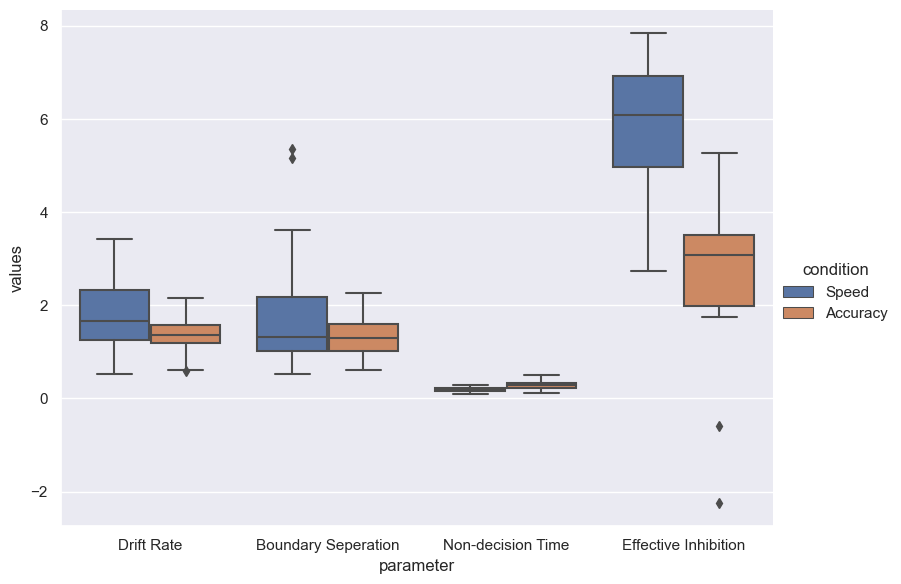

In [125]:
sns.catplot(data=df_SAT, x="parameter", y="values", hue="condition", kind="box",
            height=6, aspect=8/6)


In [120]:
import scipy

In [127]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=1.7082398176604368, pvalue=0.10387851697464259)